# Вторник

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

### Read file

In [9]:
data = pd.read_csv('adult.data', sep=',',names=['age', 'workclass', 'fnlwg', 'education','education-num','marital-status', 'occupation',
                                             'relationship', 'race', 'sex', 'capital-gain',
                                            'capital-loss', 'hours-per-week', 'country', 'receive'])
data.head()

,age,workclass,fnlwg,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,country,receive
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


### 1. How many males and females are there?

In [11]:
data.sex.value_counts()

 Male      21790
 Female    10771
Name: sex, dtype: int64

## 2. What is the mean male age?

In [12]:
male_age = data.groupby('sex')['age'].mean()[1]
print(male_age)

39.43354749885268


## 3. What is the proportion of the US citizens?

In [14]:
prop = data.country.value_counts(normalize=True)[0]
print(prop)

0.895857006848684


### 4. Plot the distribution of people’s education as a bar plot.

<BarContainer object of 16 artists>

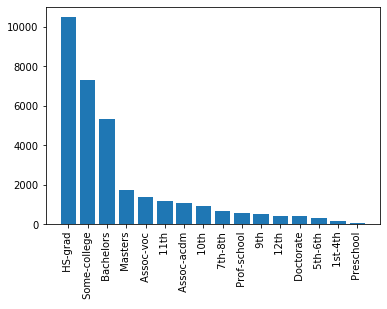

In [15]:
plt.xticks(rotation=90)
plt.bar(data.education.value_counts().index, 
        data.education.value_counts().values)

### 5. What is the mean and standard deviation of the ”final weight” for divorced people?

In [16]:
mean = data[data.marital-status == ' Divorced'].fnlwg.mean()
stand = data[data.marital-status == ' Divorced'].fnlwg.std()
print(mean)
print(stand)

185802.79045689848
105646.78945933603


### 6. Is it true that the people who receive over 50k are mostly highly educated?

In [20]:
data[data.receive == ' >50K'].education.value_counts(normalize=True)

 Bachelors       0.283255
 HS-grad         0.213621
 Some-college    0.176891
 Masters         0.122306
 Prof-school     0.053947
 Assoc-voc       0.046040
 Doctorate       0.039026
 Assoc-acdm      0.033797
 10th            0.007907
 11th            0.007652
 7th-8th         0.005101
 12th            0.004209
 9th             0.003443
 5th-6th         0.002041
 1st-4th         0.000765
Name: education, dtype: float64

#### Its True

### 7. What is the maximum male and female age for each race?

In [36]:
data.groupby(['race', 'sex']).age.max()

race                 sex    
 Amer-Indian-Eskimo   Female    80
                      Male      82
 Asian-Pac-Islander   Female    75
                      Male      90
 Black                Female    90
                      Male      90
 Other                Female    74
                      Male      77
 White                Female    90
                      Male      90
Name: age, dtype: int64

### 8. The people from which countries work as farmers/fishers?

In [23]:
data[data.occupation == ' Farming-fishing'].country.value_counts()

 United-States    879
 Mexico            77
 ?                  5
 Puerto-Rico        5
 Guatemala          4
 Philippines        4
 Canada             2
 Italy              2
 El-Salvador        2
 Vietnam            2
 Cuba               2
 Portugal           1
 Japan              1
 England            1
 Yugoslavia         1
 Ireland            1
 Cambodia           1
 Germany            1
 France             1
 Hong               1
 Poland             1
Name: country, dtype: int64

### 9. Consider the ratio of the number of 1) male bachelors to male masters, and 2) female bachelors to female masters. Which one is higher?

In [26]:
male_bach = data[(data.education == ' Bachelors') & (data.sex == ' Male')].shape[0]
male_mas = data[(data.education == ' Masters') & (data.sex == ' Male')].shape[0]
female_bach = data[(data.education == ' Bachelors') & (data.sex == ' Female')].shape[0]
female_mas = data[(data.education == ' Masters') & (data.sex == ' Female')].shape[0]
print(male_bach/male_mas)
print(female_bach/female_mas)

3.14743049705139
3.0205223880597014


### 10. What is the largest number of hours a person works a week? How many people who work this number of hours are there? What is their income?

In [35]:
larg = data['hours-per-week'].max()
num_larg = data[data['hours-per-week'] == larg]
print(larg)
print(num_larg.shape[0])
num_larg.receive.value_counts()

99
85


 <=50K    60
 >50K     25
Name: receive, dtype: int64